# Telco Customer Churn Prediction

---



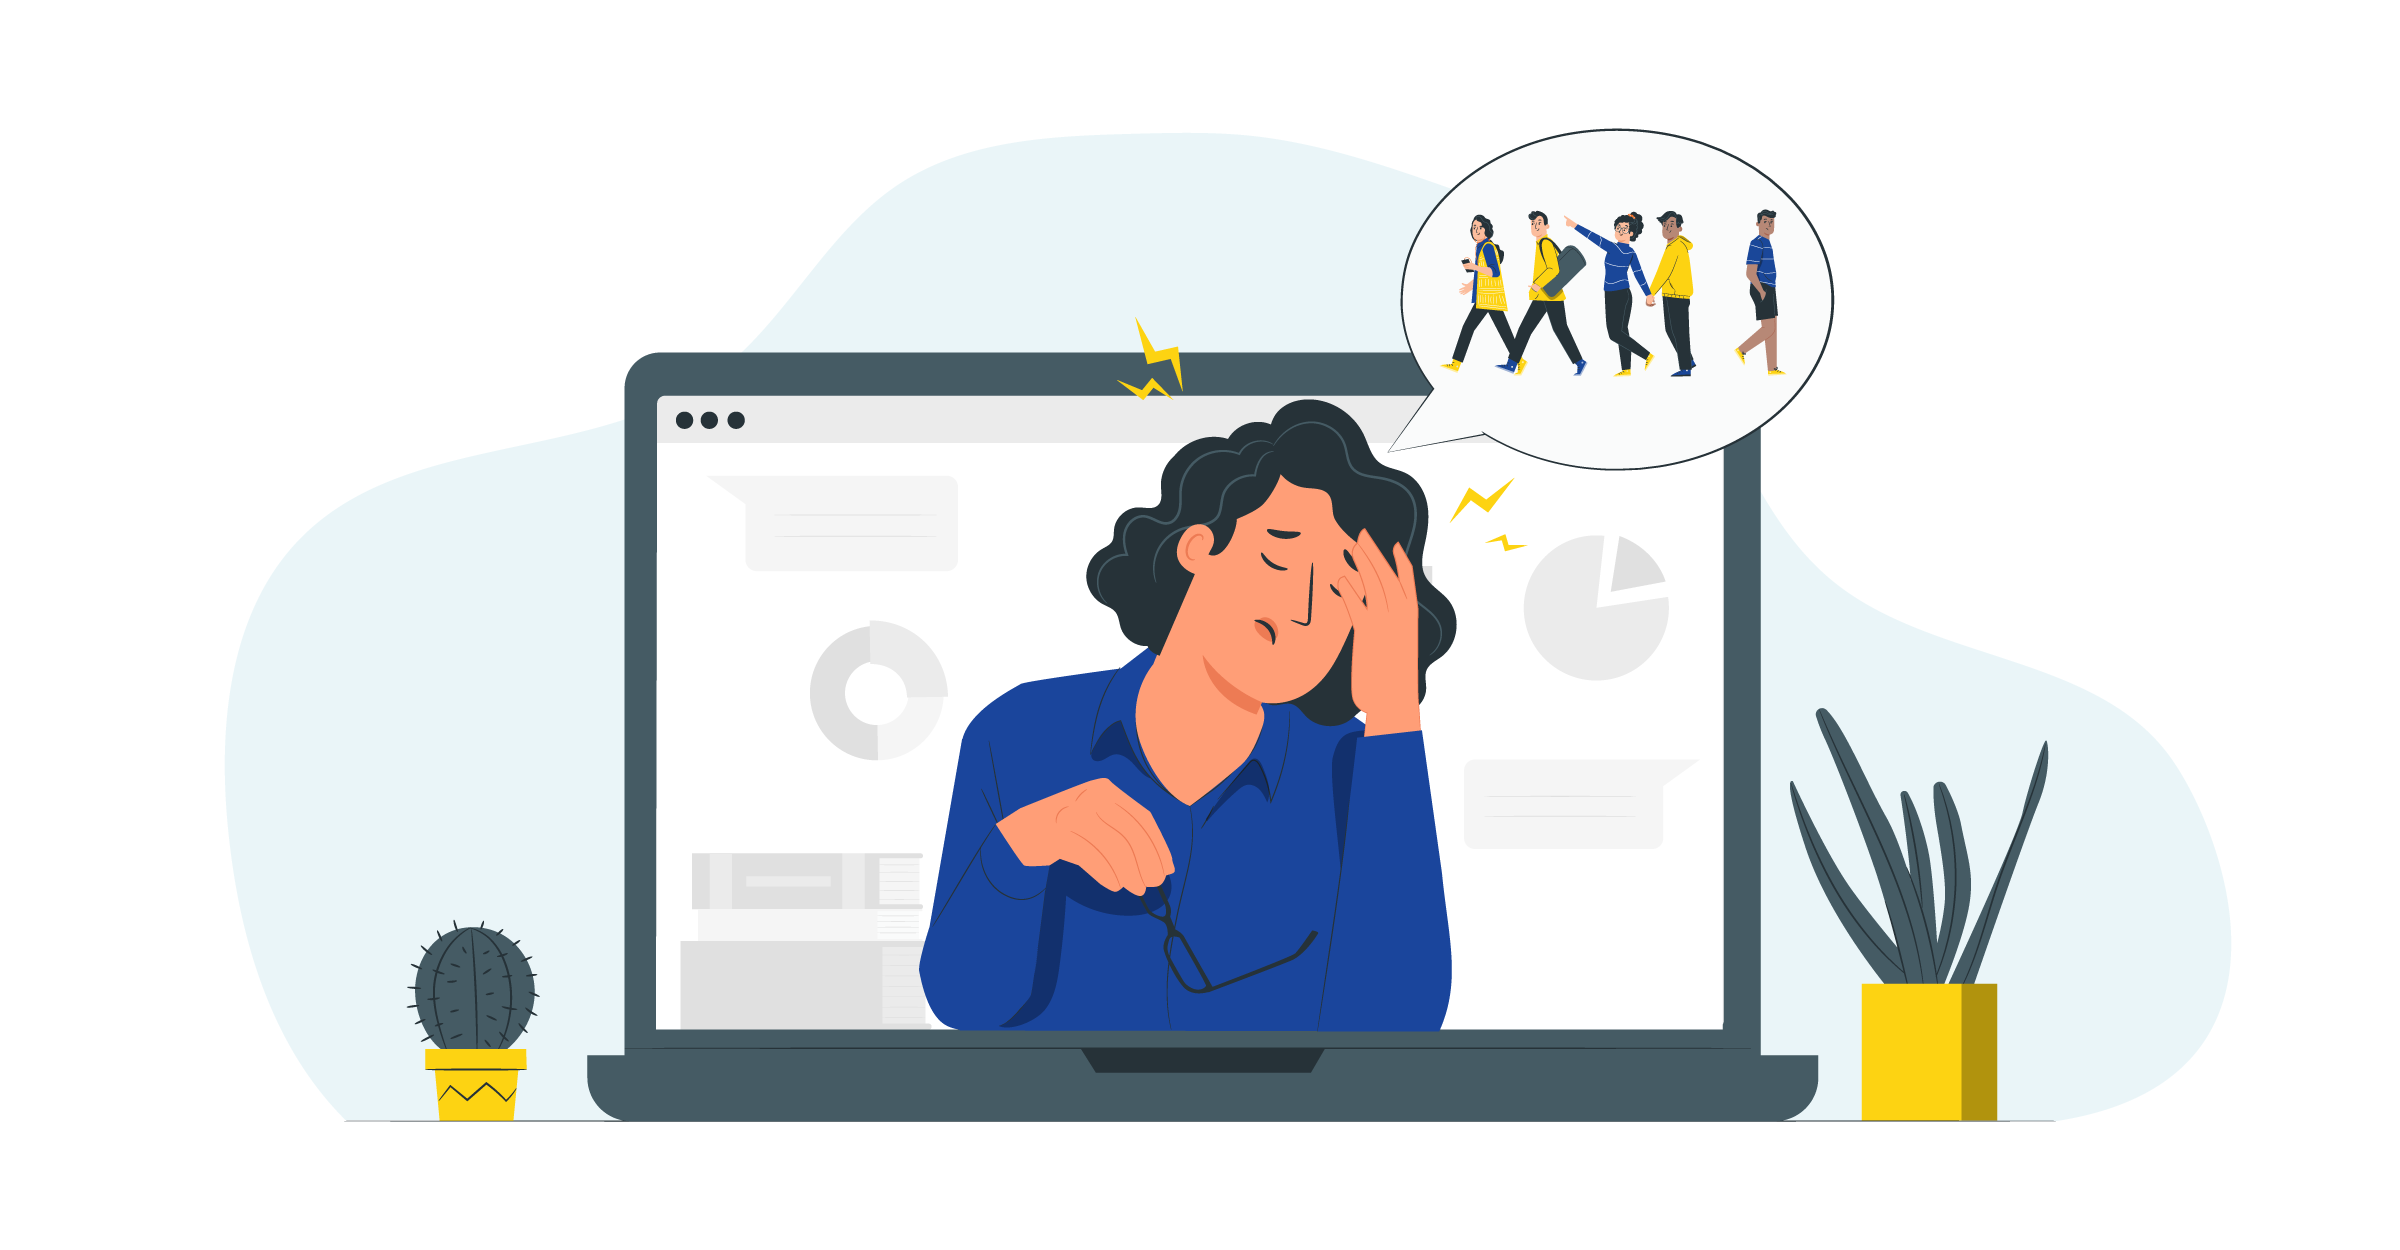

**This project aims to predict whether a customer will leave a telecommunications company.**

# Descripion

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn;
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies;
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges;
- Demographic info about customers – gender, age range, and if they have partners and dependents.

Steps:
- perform EDA;
- handling with outliers;
- preprocess the data;
- get and compare some models + ANN;
- handling with imbalanced data.

---




# Load the Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Telco Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- ***Demographic Information:***

**gender:** Whether the client is a female or a male.

**SeniorCitizen:** Whether the client is a senior citizen or not.

**Partner:** Whether the client has a partner or not.

**Dependents:** Whether the client has dependents or not.


- ***Customer Account Information:***

**tenure:** Number of months the customer has stayed with the company.

**Contract:** Indicates the customer’s current contract type.

**PaperlessBilling:** Whether the client has paperless billing or not.

**PaymentMethod:** The customer’s payment method.

**MontlyCharges:** The amount charged to the customer monthly.

**TotalCharges:** The total amount charged to the customer.


- ***Services Information***

**PhoneService:** Whether the client has a phone service or not.

**MultipleLines:** Whether the client has multiple lines or not.

**InternetServices:** Whether the client is subscribed to Internet service with the company.

**OnlineSecurity:** Whether the client has online security or not.

**OnlineBackup:** Whether the client has online backup or not.

**DeviceProtection:** Whether the client has device protection or not.

**TechSupport:** Whether the client has tech support or not.

**StreamingTV:** Whether the client has streaming TV or not.

**StreamingMovies:** Whether the client has streaming movies or not.

# EDA

## Cleaning the data

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see basic information about the data. The 'Total Charges' is of type object but it should be a float, so change this type.

In [24]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [25]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The minimum value, 25% (first quartile), 50% (second quartile or median), 75% (third quartile) and maximum value.

In [26]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

All of the observations of customerID have unique values

'customerID' is unuseful, so we can drop it.

In [27]:
df.drop('customerID', axis='columns', inplace=True)

In [28]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [29]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Values are strings, so we need to convert them to integers.

In [30]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [31]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


the column 'TotalCharges' has some missing values.

In [32]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

We can delete this data because there are few of them.

In [33]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [34]:
df.iloc[488]['TotalCharges']

' '

In [35]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [36]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

remove (automatic) from payment method names

In [38]:
df1['PaymentMethod'] = df1['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df1['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

## Data Visualization

In [40]:
import seaborn as sns

In [41]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


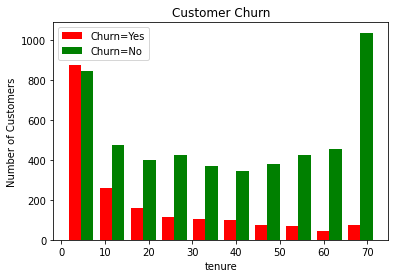

In [42]:
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn')
plt.hist([tenure_churn_yes, tenure_churn_no], color=['red','green'], label=['Churn=Yes','Churn=No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


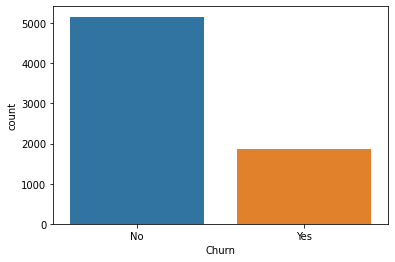

In [43]:
sns.countplot('Churn', data=df1)

There is imbalanced in the data.
Should try some techniques to handle with imbalance.

Let's look at monthly charges

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


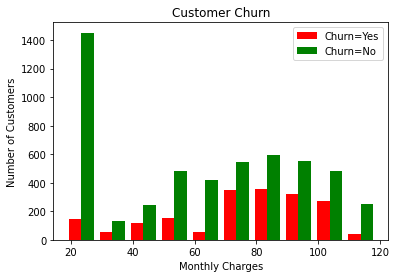

In [44]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn')

plt.hist([mc_churn_yes, mc_churn_no], color=['red','green'], label=['Churn=Yes','Churn=No'])
plt.legend()

Brief glance of the data

In [ ]:
!pip install dataprep

In [ ]:
from dataprep.eda import create_report
create_report(df1)

Output hidden; open in https://colab.research.google.com to view.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

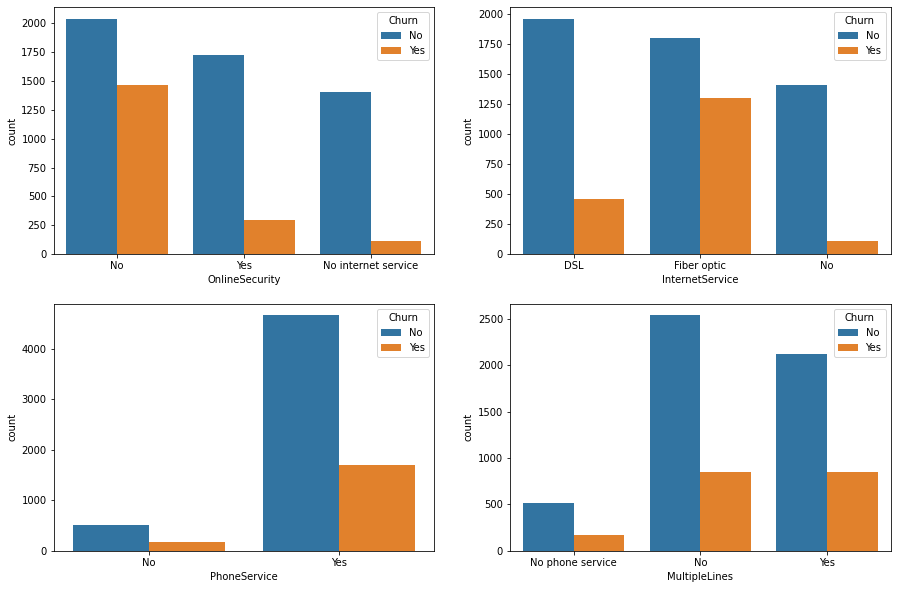

In [45]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.countplot('OnlineSecurity',hue='Churn',data=df1,ax=ax[0,0])
sns.countplot('InternetService',hue='Churn',data=df1,ax=ax[0,1])
sns.countplot('PhoneService',hue='Churn',data=df1,ax=ax[1,0])
sns.countplot('MultipleLines',hue='Churn',data=df1,ax=ax[1,1])

- OnlineSecurity: people who didn't plug online security left.
- InternetService: people with fibre optic Internet Service are more likely to move out than people with DSL.
- PhoneService: for most customers, it does not matter whether there is a mobile connection or not.
Reasons for leaving customers: the price of services or ads.

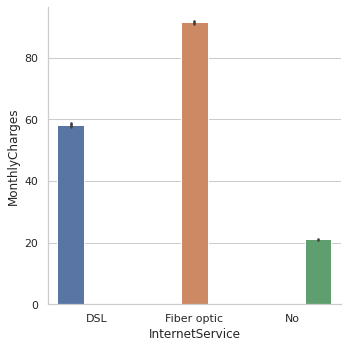

In [78]:
sns.set_theme(style="whitegrid")
sns.catplot(data=df1, x="InternetService", y="MonthlyCharges", hue="InternetService", kind="bar",)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

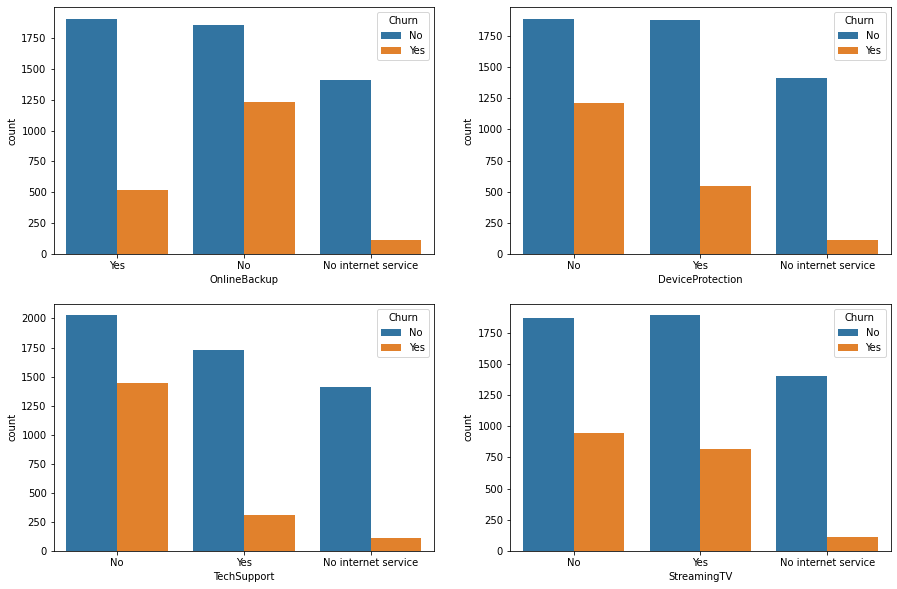

In [46]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.countplot('OnlineBackup',hue='Churn',data=df1,ax=ax[0,0])
sns.countplot('DeviceProtection',hue='Churn',data=df1,ax=ax[0,1])
sns.countplot('TechSupport',hue='Churn',data=df1,ax=ax[1,0])
sns.countplot('StreamingTV',hue='Churn',data=df1,ax=ax[1,1]);

As we see 'DeviceProtection' and 'TechSupport' have a significant impact on customer behavior.
People without any online backup service are more likely to leave the carrier.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

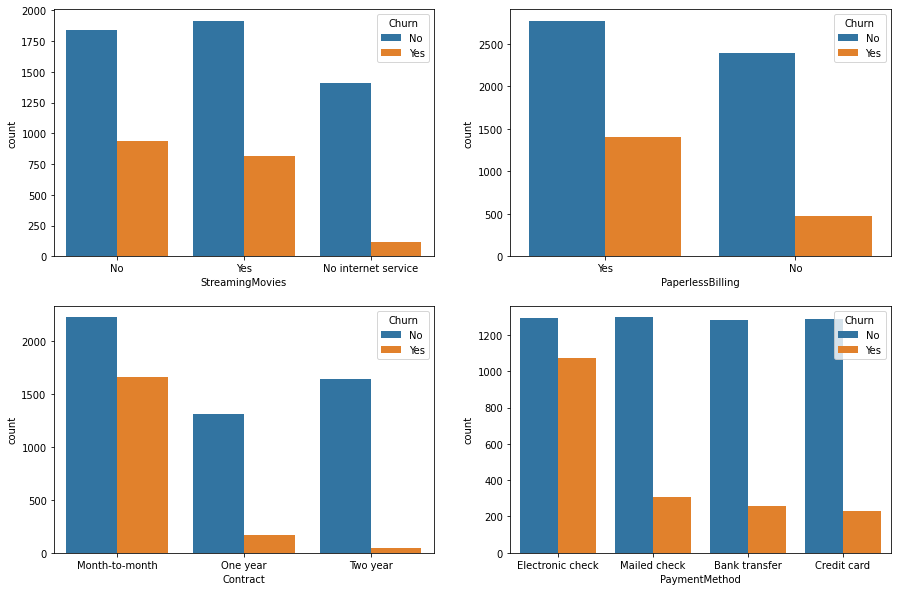

In [47]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.countplot('StreamingMovies',hue='Churn',data=df1,ax=ax[0,0])
sns.countplot('PaperlessBilling',hue='Churn',data=df1,ax=ax[0,1])
sns.countplot('Contract',hue='Churn',data=df1,ax=ax[1,0])
sns.countplot('PaymentMethod',hue='Churn',data=df1,ax=ax[1,1]);

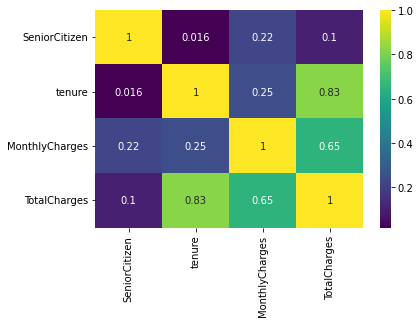

In [48]:
sns.heatmap(df1.corr(),annot=True,cmap='viridis')

# Data Preprocessing

In [49]:
def print_unique_col_values(df):
    for column in df:
      if df[column].dtypes=='object':
          print(f'{column}: {df[column].unique()}')

In [50]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [51]:
df1.replace('No internet service','No',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [52]:
df1.replace('No phone service','No',inplace=True)

In [53]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer' 'Credit card']
Churn: ['No' 'Yes']


Now the dataset is more clean than it was

Label Encoding. Replace every category with a numerical label.

In [54]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
                 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                 'PaperlessBilling','Churn']

for i in yes_no_columns:
  df1[i].replace({'Yes':1, 'No':0}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [55]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer,42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card,103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [56]:
for i in df1:
  print(f'{i}: {df1[i].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer' 'Credit card']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [57]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [58]:
for i in df1:
  print(f'{i}: {df1[i].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer' 'Credit card']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


One-Hot Encoding. Create a new binary column for each level of the categorical variable.

In [59]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check'],
      dtype='object')

In [60]:
df2.shape

(7032, 27)

In [61]:
df2.dtypes

gender                              int64
SeniorCitizen                       int64
Partner                             int64
Dependents                          int64
tenure                              int64
PhoneService                        int64
MultipleLines                       int64
OnlineSecurity                      int64
OnlineBackup                        int64
DeviceProtection                    int64
TechSupport                         int64
StreamingTV                         int64
StreamingMovies                     int64
PaperlessBilling                    int64
MonthlyCharges                    float64
TotalCharges                      float64
Churn                               int64
InternetService_DSL                 uint8
InternetService_Fiber optic         uint8
InternetService_No                  uint8
Contract_Month-to-month             uint8
Contract_One year                   uint8
Contract_Two year                   uint8
PaymentMethod_Bank transfer       

Scaling

In [63]:
col_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2[col_scale] = scaler.fit_transform(df2[col_scale])

In [65]:
df2.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
3965,1,1,1,0,0.71831,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
4954,0,0,0,1,0.00000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [66]:
for i in df2:
  print(f'{i}: {df2[i].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# Build the Model

## ANN

In [69]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [71]:
X_train.shape

(5625, 26)

In [72]:
X_test.shape

(1407, 26)

In [79]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.utils import class_weight
def ANN(X_train, y_train, X_test, y_test, loss, weights):
  model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
  ])

  model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

  if weights == -1:
    model.fit(X_train, y_train, epochs=100)
  else:
    model.fit(X_train, y_train, epochs=100, class_weight=weights)

  print(model.evaluate(X_test, y_test))

  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)

  print(f'Classification Report: \n {classification_report(y_test, y_preds)}')

  return y_preds

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5387 - accuracy: 0.7374
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.7900
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.7957
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8028
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.8004
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8048
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8057
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8096
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8101
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4075 - accura

Text(69.0, 0.5, 'Truth')

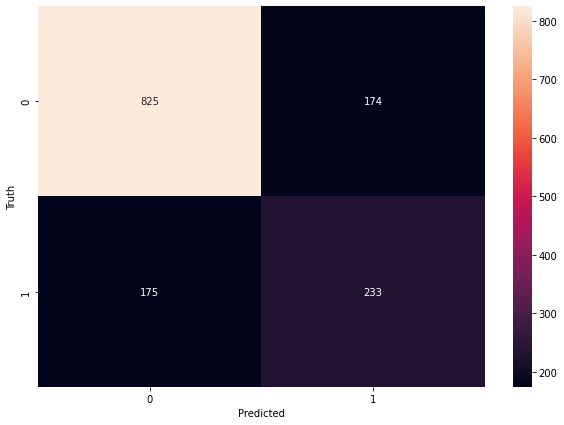

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=yp)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Handling with Imbalanced

## Undersampling

In [ ]:
count_class_0, count_class_1 = df1.Churn.value_counts()

df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [ ]:
df_class_0.shape

(5163, 27)

In [ ]:
df_class_1.shape

(1869, 27)

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)

In [ ]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [ ]:
X1 = df_test_under.drop('Churn',axis='columns')
y1 = df_test_under['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.2,random_state=15,stratify=y1)

In [ ]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6225 - accuracy: 0.6916
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5023 - accuracy: 0.7676
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4813 - accuracy: 0.7756
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.7753
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7753
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.7763
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4634 - accuracy: 0.7806
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.7823
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4587 - accuracy: 0.7833
Epoch 10/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4577 - accuracy: 0.7833
Epoch 11/

precision and recall are better now

## Oversampling

In [ ]:
count_class_0, count_class_1

(5163, 1869)

In [ ]:
df_class_1.sample(count_class_0,replace=True).shape

(5163, 27)

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.shape

(10326, 27)

In [ ]:
print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [ ]:
X2 = df_test_over.drop('Churn',axis='columns')
y2 = df_test_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.2,random_state=15,stratify=y2)

In [ ]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5567 - accuracy: 0.7240
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4945 - accuracy: 0.7575
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7636
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.7672
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7701
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7662
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4727 - accuracy: 0.7697
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7715
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7696
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4664 - accura

## SMOTE

In [ ]:
X3 = df2.drop('Churn',axis='columns')
y3 = df2['Churn']

In [ ]:
y3.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X3, y3)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [ ]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5271 - accuracy: 0.7435
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.7777
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7818
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.7867
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.7873
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.7930
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.7921
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.7936
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.7949
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4355 - accura

## Ensemble with undersampling

In [ ]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
X4 = df2.drop('Churn',axis='columns')
y4 = df2['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X4,y4,test_size=0.2,random_state=15,stratify=y4)

In [ ]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [ ]:
4130/1495

2.762541806020067

In [ ]:
4130/3

1376.6666666666667

In [ ]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [ ]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [ ]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [ ]:
def get_train_batch(df_majority, df_minority, start, end):
  df_train = pd.concat([df_majority[start:end], df_minority], axis=0)
  X_train = df_train.drop('Churn', axis='columns')
  y_train = df_train.Churn
  return X_train, y_train

In [ ]:
X_train, y_train = get_train_batch(df3_class0,df3_class1,0,1495)

X_train.shape

(2990, 26)

In [ ]:
y_pred1 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6252 - accuracy: 0.6666
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.7478
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.7645
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7659
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.7689
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4869 - accuracy: 0.7716
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7736
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7732
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7736
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7726
Epoch 11/

In [ ]:
X_train, y_train = get_train_batch(df3_class0,df3_class1,1495,2990)

y_pred2 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6485 - accuracy: 0.6375
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5395 - accuracy: 0.7518
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.7555
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4955 - accuracy: 0.7595
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7599
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7656
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.7622
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7645
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7649
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7699
Epoch 11/

In [ ]:
X_train, y_train = get_train_batch(df3_class0,df3_class1,2990,4130)

y_pred3 = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6435 - accuracy: 0.6342
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.7602
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7696
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7757
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7750
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.7757
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7833
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7814
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7787
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4603 - accuracy: 0.7867
Epoch 11/

In [ ]:
vote1 = 0
vote2 = 1
vote3 = 1

vote1+vote2+vote3

2

In [ ]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
  n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]
  if n_ones>1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0

# Conclusion

---



Customers who had fiber optic left. Most likely this is due to the price of this service, since fiber optic is more expensive than DSL. It would be possible to switch to DSL, but the Internet speed would be much less. It is also possible that customers could find this service cheaper in another company.

Also "OnlineSecurity", "OnlineBackup", "DeviceProtection" and "TechSupport" have a strong influence on the decision of customers. This may also be related to the price and quality of these services.

Customers who have been with the company longer are on average paying more every month and are less likely to churn.

In this project ANN was used with SMOTE and we got 80% of accuracy.